In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpmath import findroot, exp


## Problem 1 - Photon Energy Density in Thermal Equilibrium

Using the Bose–Einstein distribution  

$$
n(E) = \frac{g(E)}{e^{E/(kT)} - 1},
$$

and the photon momentum–frequency relation  
$ p_\nu = \tfrac{h\nu}{c} $,  
derive the energy density of photons per frequency interval $ d\nu $ in thermal equilibrium.  
Then express the result per wavelength interval $ d\lambda $.

**Target results**

$$
u(\nu)\,d\nu = \frac{8\pi h\nu^{3}}{c^{3}}
\frac{d\nu}{e^{h\nu/(kT)} - 1},
\qquad
u(\lambda)\,d\lambda = \frac{8\pi hc}{\lambda^{5}}
\frac{d\lambda}{e^{hc/(\lambda kT)} - 1}.
$$

---

### Derivation

**1) Photon density of states (per unit volume)**  

To find the number of allowed photon modes, we imagine a cubic cavity of side $L$ and volume $V = L^3$.

Under **periodic boundary conditions**, the allowed wavevectors are

$$
k_x = \frac{2\pi n_x}{L}, \quad
k_y = \frac{2\pi n_y}{L}, \quad
k_z = \frac{2\pi n_z}{L},
$$

where $n_x, n_y, n_z$ are integers.  
The spacing between adjacent $k$ values is $\Delta k_x = 2\pi/L$, so each allowed state occupies a small cube of volume

$$
(\Delta k_x)(\Delta k_y)(\Delta k_z)
= \left(\frac{2\pi}{L}\right)^3
= \frac{(2\pi)^3}{V}
$$

in $k$-space.  

Hence, there is **one state per $(2\pi)^3/V$ of $k$-space volume**, or equivalently a **state density** of $V/(2\pi)^3$ per unit $k$-space volume.

Including both polarizations of light, the number of states between $k$ and $k + dk$ per unit volume is

$$
g(k)\,dk = \frac{1}{V}\frac{V}{(2\pi)^3}\,4\pi k^2\,dk \times 2
= \frac{k^2}{\pi^2}\,dk.
$$

Using $\omega = ck$ and $dk = d\omega / c$,

$$
g(\omega)\,d\omega = \frac{\omega^2}{\pi^2 c^3}\,d\omega.
$$

Equivalently, since $\omega = 2\pi\nu$ and $d\omega = 2\pi\,d\nu$,

$$
g(\nu)\,d\nu = \frac{8\pi\nu^2}{c^3}\,d\nu.
$$

---

**2) Bose–Einstein occupation and energy per mode**

The mean occupation number is

$$
\bar{n}(\nu) = \frac{1}{e^{h\nu/(kT)} - 1},
$$

and each mode carries energy $E = h\nu$.  
Therefore, the energy density per frequency interval is

$$
u(\nu)\,d\nu = (h\nu)\,\bar{n}(\nu)\,g(\nu)\,d\nu
= \frac{8\pi h\nu^{3}}{c^{3}}
\frac{d\nu}{e^{h\nu/(kT)} - 1}.
$$

---

**3) Convert to wavelength**

Using $\nu = c/\lambda$ and $\left|\frac{d\nu}{d\lambda}\right| = \frac{c}{\lambda^2}$,

$$
u(\lambda)\,d\lambda = u(\nu)\,\left|\frac{d\nu}{d\lambda}\right|\,d\lambda
= \frac{8\pi h\nu^{3}}{c^{3}}
\frac{c\,d\lambda}{\lambda^{2}\,[e^{h\nu/(kT)} - 1]}.
$$

Substitute $\nu = c/\lambda$:

$$
u(\lambda)\,d\lambda =
\frac{8\pi hc}{\lambda^{5}}
\frac{d\lambda}{e^{hc/(\lambda kT)} - 1}.
$$

---

**Final Results**

$$
u(\nu)\,d\nu = \frac{8\pi h\nu^{3}}{c^{3}}
\frac{d\nu}{e^{h\nu/(kT)} - 1},
\qquad
u(\lambda)\,d\lambda = \frac{8\pi hc}{\lambda^{5}}
\frac{d\lambda}{e^{hc/(\lambda kT)} - 1}.
$$


In [35]:
#Problem 1 - Planck energy densities (functions)
h = 6.62607015e-27
c = 2.99792458e10
kB = 1.380649e-16

def u_nu(nu, T):
    x = h*nu/(kB*T)
    return (8*np.pi*h*nu**3)/(c**3) / np.expm1(x)

def u_lambda(lam, T):
    x = h*c/(lam*kB*T)
    return (8*np.pi*h*c)/(lam**5) / np.expm1(x)

print('u_nu(1e14 Hz, 3000 K) =', u_nu(1e14, 3000.0))
print('u_lambda(5000 Å, 6000 K) =', u_lambda(5000e-8, 6000.0))

u_nu(1e14 Hz, 3000 K) = 1.564014244046853e-15
u_lambda(5000 Å, 6000 K) = 133115.10945607192


### Discussion

For a frequency of $10^{14}\,\mathrm{Hz}$ at $T = 3000\,\mathrm{K}$:

$$
u_\nu = 1.56\times10^{-15}\;\mathrm{erg\,cm^{-3}\,Hz^{-1}},
$$

which is extremely small - corresponding to the far-infrared tail of a $3000\,\mathrm{K}$ blackbody where the photon occupation number is low.

For a wavelength of $5000\,\text{Å}$ ($5\times10^{-5}\,\mathrm{cm}$) at $T = 6000\,\mathrm{K}$:

$$
u_\lambda = 1.33\times10^{5}\;\mathrm{erg\,cm^{-3}\,cm^{-1}},
$$

a value characteristic of the visible-light peak near the solar temperature.  

The contrast between these results illustrates how strongly the Planck function rises with temperature and shifts toward shorter wavelengths, in agreement with **Wien’s law**.


## Problem 2 - Total Radiation Energy Density and the Stefan–Boltzmann Law

Starting from the Planck energy density per frequency interval,

$$
u_\nu(T)=\frac{8\pi h\nu^3}{c^3}\,\frac{1}{e^{h\nu/(kT)}-1},
$$

we seek the **total energy density** of the photon field in thermal equilibrium and its connection to the **Stefan–Boltzmann law**.

---

### 1) Integrating over frequency

$$
u(T)=\int_0^\infty u_\nu(T)\,d\nu
=\int_0^\infty \frac{8\pi h\nu^3}{c^3}\,
\frac{d\nu}{e^{h\nu/(kT)}-1}.
$$

---

### 2) Change of variables

Let
$$
x=\frac{h\nu}{kT},\qquad
\nu=\frac{kT}{h}x,\qquad
d\nu=\frac{kT}{h}\,dx.
$$

Then
$$
\nu^3\,d\nu=\left(\frac{kT}{h}\right)^4 x^3\,dx,
$$
so
$$
u(T)=\frac{8\pi (kT)^4}{h^3 c^3}
\int_0^\infty \frac{x^3}{e^x-1}\,dx.
$$

---

### 3) Evaluating the integral

Expand
$$
\frac{1}{e^x-1}=\sum_{n=1}^\infty e^{-nx},
$$
and integrate term by term:
$$
\int_0^\infty x^3 e^{-nx}\,dx
=\frac{1}{n^4}\int_0^\infty y^3 e^{-y}\,dy
=\frac{6}{n^4}.
$$

Hence
$$
\int_0^\infty \frac{x^3}{e^x-1}\,dx
=6\sum_{n=1}^\infty \frac{1}{n^4}
=6\,\zeta(4)
=6\left(\frac{\pi^4}{90}\right)
=\frac{\pi^4}{15}.
$$

---

### 4) Substitute the result

$$
u(T)=\frac{8\pi (kT)^4}{h^3 c^3}\left(\frac{\pi^4}{15}\right)
=\frac{8\pi^5 k^4}{15 h^3 c^3}\,T^4.
$$

Thus,
$$
\boxed{\,u(T)=a\,T^4\,},\qquad
a=\frac{8\pi^5 k^4}{15 h^3 c^3}.
$$

---

### 5) Relating $u$ to radiative flux

For isotropic radiation,
$$
u_\nu=\frac{4\pi}{c}\,I_\nu,
$$
so
$$
u=\frac{4\pi}{c}\int_0^\infty I_\nu\,d\nu.
$$

The emergent flux from a black surface is
$$
F=\int_0^\infty\!\!\int_0^{2\pi}\!\!\int_0^{\pi/2}
I_\nu\cos\theta\,\sin\theta\,d\theta\,d\phi\,d\nu.
$$

Angular integral:
$$
\int_0^{2\pi}\!\!\int_0^{\pi/2}\cos\theta\,\sin\theta\,d\theta\,d\phi
=2\pi\int_0^{\pi/2}\cos\theta\,\sin\theta\,d\theta
=2\pi\left[\tfrac12\sin^2\theta\right]_0^{\pi/2}
=\pi.
$$

Hence
$$
F=\pi\int_0^\infty I_\nu\,d\nu
=\pi\left(\frac{c}{4\pi}u\right)
=\frac{c}{4}\,u.
$$

---

### 6) Stefan–Boltzmann constant

Using $u=aT^4$,
$$
F=\frac{c}{4}a\,T^4=\sigma T^4,
\qquad
\sigma=\frac{ac}{4}
=\frac{2\pi^5 k^4}{15 h^3 c^2}.
$$

---

### Final results

$$
\boxed{\,u(T)=aT^4,\qquad a=\frac{8\pi^5 k^4}{15 h^3 c^3}\,}
$$

$$
\boxed{\,F=\sigma T^4,\qquad \sigma=\frac{2\pi^5 k^4}{15 h^3 c^2},\qquad a=\frac{4\sigma}{c}\,}
$$

The $T^4$ scaling shows that total photon energy density grows steeply with temperature, and the same dependence gives the **Stefan–Boltzmann law** for blackbody flux.


In [36]:
#Problem 2 - total energy density u(T) = a T^4
h = 6.62607015e-27
c = 2.99792458e10
kB = 1.380649e-16
sigma = 5.670374419e-5
a_calc = (8*np.pi**5 * kB**4)/(15*h**3*c**3)
print({'a_calc': a_calc, '4sigma/c': 4*sigma/c, 'ratio': a_calc/(4*sigma/c)})
def total_u(T):
    return a_calc * T**4
print('u(300 K) =', total_u(300.0), 'erg/cm^3')

{'a_calc': 7.565733250280004e-15, '4sigma/c': 7.565733250033928e-15, 'ratio': 1.000000000032525}
u(300 K) = 6.128243932726803e-05 erg/cm^3


### Discussion

The total photon energy density derived,

$$
u(T) = aT^4, \qquad a = \frac{8\pi^5 k^4}{15 h^3 c^3},
$$

shows that the **radiation energy density increases as the fourth power of temperature**.  

This $T^4$ dependence reflects the rapidly growing number of thermally accessible photon modes as temperature rises.

The corresponding radiative flux from a blackbody surface is

$$
F = \sigma T^4, \qquad \sigma = \frac{ac}{4},
$$

which is the **Stefan–Boltzmann law**.  

The constant $a$ represents the **energy density per unit volume per $T^4$**, while $\sigma$ gives the **emitted power per unit area**.  

Together, they confirm that integrating the Planck spectrum reproduces the empirical Stefan–Boltzmann law and ties thermodynamics directly to quantum theory.


## Problem 3 - Solar Effective Temperature from Angular Radius and Solar Constant

Given the **solar angular radius** $\alpha = 16'$ (arcminutes) and the **solar constant**
$$
S = 1.338\times10^{6}\ \mathrm{erg\ s^{-1}\ cm^{-2}},
$$
assume the Sun radiates as a perfect blackbody.

---

### 1) Relation between observed flux and emitted flux

At the Earth’s distance, the solar flux is

$$
S = \frac{L}{4\pi d^2},
$$

where $L$ is the Sun’s luminosity and $d$ is the Earth–Sun distance.

For a blackbody emitter,

$$
L = 4\pi R^2 \sigma T_{\rm eff}^4,
$$

so

$$
S = \frac{4\pi R^2 \sigma T_{\rm eff}^4}{4\pi d^2}
  = \sigma T_{\rm eff}^4 \left(\frac{R}{d}\right)^2.
$$

Using the **small-angle approximation** ($\alpha \simeq R/d$ in radians):

$$
\boxed{S = \sigma T_{\rm eff}^4\,\alpha^2.}
$$

---

### 2) Solve for the effective temperature

$$
\boxed{
T_{\rm eff} = \left(\frac{S}{\sigma\,\alpha^2}\right)^{1/4}.
}
$$

---

### 3) Converting angular radius to radians

$$
\alpha = 16\ \text{arcmin}
\times \frac{\pi}{180^\circ}
\times \frac{1}{60}
= 4.65\times10^{-3}\ \text{radians}.
$$

---

### 4) Substitute numerical values

Using
$$
\sigma = 5.6704\times10^{-5}\ \mathrm{erg\ cm^{-2}\ s^{-1}\ K^{-4}},
$$
we find

$$
T_{\rm eff}
= \left(\frac{1.338\times10^{6}}
  {(5.6704\times10^{-5})(4.65\times10^{-3})^2}\right)^{1/4}
\simeq 5.78\times10^{3}\ \mathrm{K}.
$$

---

### **Final Result**

$$
\boxed{T_{\rm eff} \approx 5.8\times10^{3}\ \mathrm{K}}
$$

In [37]:
#Problem 3 - compute T_eff
sigma = 5.670374419e-5
S = 1.338e6
alpha = 16.0 * (np.pi/180.0) / 60.0 #radians
T_eff = (S/(sigma*alpha**2))**0.25
print({'alpha_rad': float(alpha), 'T_eff_from_data': float(T_eff)})

{'alpha_rad': 0.004654211338651545, 'T_eff_from_data': 5744.973692123828}


### Discussion

Using $\alpha = 16'$ gives

$$
\alpha \approx 0.0046542113\ \mathrm{rad},
$$

and therefore

$$
T_{\rm eff} = \left(\frac{S}{\sigma\,\alpha^2}\right)^{1/4}
\approx 5.745\times10^{3}\ \mathrm{K}.
$$

This value, $T_{\rm eff} \approx 5745\ \mathrm{K}$, is **very close to the accepted solar effective temperature**
($T_\odot \approx 5772\ \mathrm{K}$).  
The small difference arises naturally because:

1. The solar constant varies slightly with solar activity and measurement epoch.  
2. The Sun is not a perfect blackbody emitter.  
3. The small-angle approximation $\,\alpha \simeq R/d\,$ introduces a minor geometric simplification.

The relation

$$
S = \sigma T_{\rm eff}^4\,\alpha^2
$$

connects the **observed solar irradiance** to the **Sun’s intrinsic temperature** using geometry and the blackbody radiation law.


## Problem 4 - Wien’s Displacement Law and Solar Temperature from $\lambda_{\max}$

We want $\lambda_{\max}$ that maximizes the Planck function per wavelength:
$$
B_\lambda(\lambda,T)=\frac{2hc^2}{\lambda^5}\,\frac{1}{e^{hc/(\lambda kT)}-1}.
$$

---

### Step 1 - Set derivative to zero
The maximum satisfies
$$
\frac{dB_\lambda}{d\lambda}=0.
$$
It is cleaner to differentiate $\ln B_\lambda$ (same extremum). Write
$$
\ln B_\lambda=\ln(2hc^2)-5\ln\lambda-\ln\!\big(e^{hc/(\lambda kT)}-1\big).
$$

---

### Step 2 - Introduce a dimensionless variable and compute derivatives
Define
$$
x\equiv\frac{hc}{\lambda kT}
\qquad\Rightarrow\qquad
\frac{dx}{d\lambda}=-\frac{x}{\lambda}.
$$
Differentiate $\ln B_\lambda$ with respect to $\lambda$:
$$
\frac{d}{d\lambda}\ln B_\lambda
= -\frac{5}{\lambda}
- \frac{1}{e^x-1}\,\frac{d}{d\lambda}(e^x-1)
= -\frac{5}{\lambda}
- \frac{e^x}{e^x-1}\,\frac{dx}{d\lambda}.
$$
Set this to zero and substitute $\displaystyle \frac{dx}{d\lambda}=-\frac{x}{\lambda}$:
$$
-\frac{5}{\lambda}-\frac{e^x}{e^x-1}\!\left(-\frac{x}{\lambda}\right)=0
\;\Longrightarrow\;
-5+\frac{x\,e^x}{e^x-1}=0.
$$

---

### Step 3 - Transcendental equation
Rearrange:
$$
\frac{x\,e^x}{e^x-1}=5
\;\Longleftrightarrow\;
x=5\left(1-e^{-x}\right).
$$

---

### Step 4 - Numerical solution for the peak
The unique positive root is
$$
\boxed{x_{\max}\approx 4.965114}.
$$

---

### Step 5 - Wien’s displacement law
From $x=\dfrac{hc}{\lambda kT}$,
$$
\boxed{\lambda_{\max}T=\frac{hc}{k\,x_{\max}}\equiv b}.
$$
With $x_{\max}\approx4.965114$, we have derived Wien's constant
$$
\boxed{b \approx 2.89777\times10^{-3}\ \mathrm{m\,K}}
\qquad\text{and}\qquad
\boxed{b \approx 2.89777\times10^{-1}\ \mathrm{cm\,K}}.
$$

---

### Step 6 - Solar surface temperature from $\lambda_{\max}=5000\,\text{Å}$
Convert the wavelength:
$$
\lambda_{\max}=5000\,\text{Å}=5\times10^{-7}\ \mathrm{m}=5\times10^{-5}\ \mathrm{cm}.
$$
Apply Wien’s law:
$$
T=\frac{b}{\lambda_{\max}}
=\frac{2.89777\times10^{-3}\ \mathrm{m\,K}}{5\times10^{-7}\ \mathrm{m}}
\simeq 5.7955\times10^{3}\ \mathrm{K}.
$$

**Final result**
$$
\boxed{T_{\odot}\approx 5.80\times10^{3}\ \mathrm{K}}
$$


In [38]:
#Problem 4 - solve for Wien constant and T for lambda_max
h = 6.62607015e-27
c = 2.99792458e10
kB = 1.380649e-16

f = lambda x: 5*(1 - exp(-x)) - x
x_root = float(findroot(f, 5)) #we are starting near 5 because we can reverse engineer ~generally~ what we think the root is going to be
#from Wien's constant (we derive it above, but it is well-known)
b_cmK  = (h*c)/(kB*x_root) 

lam_max_A = 5000.0
lam_max_cm = lam_max_A*1e-8
T_from_lambda = b_cmK/lam_max_cm
print({'x_root': x_root, 'b_cmK': b_cmK, 'T_from_lambdaMax_5000A': T_from_lambda})


{'x_root': 4.965114231744276, 'b_cmK': 0.28977719551851727, 'T_from_lambdaMax_5000A': 5795.543910370345}


### Discussion

The numerical solution $x_{\max} = 4.965$ yields a Wien constant  
$$
b = 2.8978\times10^{-3}\ \mathrm{m\,K},
$$
consistent with the standard value.  

Using this, a wavelength of $5000\,\text{Å}$ corresponds to  
$$
T \approx 5.8\times10^{3}\ \mathrm{K}.
$$

This temperature matches the Sun’s effective temperature  ($T_\odot \simeq 5770\ \mathrm{K}$), confirming that the visible peak of the solar spectrum is well explained by a blackbody distribution. Small deviations arise from astrophysical effects (e.g. limb darkening, etc), but the overall agreement illustrates how closely stellar spectra follow the Planck law.


## Problem 5 - Nuclear Binding Energy: $4\,\mathrm{H}\rightarrow \mathrm{He}$

**Given (atomic masses):**

$$
m_{\mathrm H}=1.007825\ \mathrm{amu},\qquad
m_{\mathrm{He}}=4.002603\ \mathrm{amu}.
$$

**Constants:**

$$
1\ \mathrm{amu}=1.66053886\times10^{-24}\ \mathrm{g},\qquad
c=2.99792458\times10^{10}\ \mathrm{cm\,s^{-1}}.
$$

Because we use **atomic** masses, electron masses and $e^+e^-$ annihilation are already included in $\Delta m$.

---

### 1) Mass defect for $4\mathrm{H}\rightarrow \mathrm{He}$

$$
\Delta m \;=\; 4\,m_{\mathrm H}-m_{\mathrm{He}}
=4(1.007825)-4.002603
=\boxed{\,0.028697\ \mathrm{amu}\,}.
$$

Convert to grams:

$$
\Delta m\ (\mathrm g)=0.028697\times 1.66053886\times10^{-24}
=\boxed{\,4.765248\times10^{-26}\ \mathrm{g}\,}.
$$

---

### 2) Energy released per reaction

$$
Q \;=\; \Delta m\,c^{2}
=\left(4.765248\times10^{-26}\ \mathrm{g}\right)
\left(2.99792458\times10^{10}\ \mathrm{cm\,s^{-1}}\right)^{2}
=\boxed{\,4.28279\times10^{-5}\ \mathrm{erg}\,}.
$$

---

### 3) Specific energy (per gram)

Initial mass of four hydrogens:

$$
4m_{\mathrm H}=4.031300\ \mathrm{amu}
\;\Rightarrow\;
m_{4\mathrm H}=4.031300\times 1.66053886\times10^{-24}
=\boxed{\,6.69413\times10^{-24}\ \mathrm{g}\,}.
$$

Mass of one helium atom:

$$
m_{\mathrm{He}}=4.002603\ \mathrm{amu}
\;\Rightarrow\;
m_{\mathrm{He}}=4.002603\times 1.66053886\times10^{-24}
=\boxed{\,6.64648\times10^{-24}\ \mathrm{g}\,}.
$$

Specific energies:

$$
\epsilon_{\mathrm H}
=\frac{Q}{4m_{\mathrm H}}
=\frac{4.28279\times10^{-5}}{6.69413\times10^{-24}}
=\boxed{\,6.398\times10^{18}\ \mathrm{erg\ g^{-1}}\,},
$$

$$
\epsilon_{\mathrm{He}}
=\frac{Q}{m_{\mathrm{He}}}
=\frac{4.28279\times10^{-5}}{6.64648\times10^{-24}}
=\boxed{\,6.444\times10^{18}\ \mathrm{erg\ g^{-1}}\,}.
$$

---

### 4) Compact results

$$
\boxed{\,Q \approx 4.283\times10^{-5}\ \mathrm{erg}\ \text{ per }\ 4\mathrm H\!\rightarrow\!\mathrm{He}\,}
$$

$$
\boxed{\,\epsilon_{\mathrm H} \approx 6.40\times10^{18}\ \mathrm{erg\ g^{-1}},\qquad
\epsilon_{\mathrm{He}} \approx 6.44\times10^{18}\ \mathrm{erg\ g^{-1}}\,}
$$


In [39]:
#Problem 5 - mass defect and energies
c = 2.99792458e10
amu_to_g = 1.66053886e-24
mH = 1.007825
mHe = 4.002603
dm = 4*mH - mHe
Q_erg = dm * amu_to_g * c**2
erg_per_g_H = (dm/(4*mH))*c**2
erg_per_g_He = (dm/(mHe))*c**2
MeV_per_amu = 931.49410242
Q_MeV = dm * MeV_per_amu
print({'delta_m_amu': dm, 'Q_erg_per_4H': Q_erg, 'Q_MeV_per_4H': Q_MeV})
print({'erg_per_g_initial_H': erg_per_g_H, 'erg_per_g_resulting_He': erg_per_g_He})

{'delta_m_amu': 0.028697000000000195, 'Q_erg_per_4H': 4.282791647396813e-05, 'Q_MeV_per_4H': 26.73108625714692}
{'erg_per_g_initial_H': 6.397831311043741e+18, 'erg_per_g_resulting_He': 6.443701102560167e+18}


### Discussion

The computed mass defect of $\Delta m = 0.028697\ \mathrm{amu}$ corresponds to an energy release of $Q \approx 26.7\ \mathrm{MeV}$ per $4\,\mathrm{H}\!\rightarrow\!\mathrm{He}$ reaction, or equivalently $Q \approx 4.28\times10^{-5}\ \mathrm{erg}$ in cgs units.

Expressed per gram of material, the available nuclear energy is of order $\epsilon \sim 6\times10^{18}\ \mathrm{erg\ g^{-1}}$, whether normalized to the initial hydrogen mass or to the final helium mass. This enormous specific energy is typical of hydrogen fusion and depicts stellar power generation.

The result reflects the high binding energy of ${}^{4}\mathrm{He}$ and demonstrates that even a tiny mass deficit corresponds, through $E=mc^2$, to the Sun’s enormous radiative energy output.


## Problem 6 — Wien Peak for an O5 Star ($T = 35{,}000\ \mathrm{K}$)

A blackbody’s peak wavelength satisfies **Wien’s displacement law**,
derived from the maximum of Planck’s function:
$$
\lambda_{\max} T = b,
$$
where $b = 2.8978\times10^{-3}\ \mathrm{m\,K}$ is the **Wien constant** (we derived above).

For an O5 star at $T = 35{,}000\ \mathrm{K}$,
$$
\lambda_{\max} = \frac{b}{T}
= \frac{2.8978\times10^{-3}}{3.5\times10^{4}}
= 8.28\times10^{-8}\ \mathrm{m}
= \boxed{\,82.8\ \mathrm{nm}\,}.
$$

This wavelength lies in the **extreme ultraviolet (EUV)** region ($\sim10$–$121\ \mathrm{nm}$).

In [40]:
#Problem 6 - Wien peak for T=35,000 K (in nm) and region
b_mK = 2.897771955e-3  # m K
T = 35000.0
lam_m = b_mK / T
lam_nm = lam_m * 1e9

region = 'extreme ultraviolet (EUV)' if lam_nm < 121 else 'ultraviolet'
print({'lambda_max_nm': lam_nm, 'region': region})

{'lambda_max_nm': 82.79348442857143, 'region': 'extreme ultraviolet (EUV)'}


### Discussion

An O5 star therefore emits most of its energy well below the visible range,
with $\lambda_{\max}\approx83\ \mathrm{nm}$.
Such a short-wavelength peak reflects its extremely high temperature and explains the star’s
intense ionizing radiation and predominantly blue/UV spectrum.
In contrast, cooler stars (like the Sun at $\sim5800$ K) peak near $500$ nm in visible light.

## Problem 7 - Radii of Main-Sequence Stars from $M_{\rm bol}$ and $T_{\rm eff}$

**Given:**
- B0: $M_{\rm bol}=-6.7$,  $T_{\rm eff}=21000\ \mathrm{K}$
- A5: $M_{\rm bol}=+1.7$, $T_{\rm eff}=8100\ \mathrm{K}$
- M0: $M_{\rm bol}=+7.6$, $T_{\rm eff}=3300\ \mathrm{K}$

Use
$$
\frac{L}{L_\odot}=10^{-0.4\,(M_{\rm bol}-M_{\rm bol,\odot})},\qquad
M_{\rm bol,\odot}=4.74,
$$
and (blackbody scaling)
$$
\frac{R}{R_\odot}
=\sqrt{\frac{L}{L_\odot}}
\left(\frac{T_\odot}{T_{\rm eff}}\right)^2,\qquad
T_\odot=5772\ \mathrm{K}.
$$

---

### 1) Luminosities (relative to the Sun)

For each spectral type,
$$
\left(\frac{L}{L_\odot}\right)_{\rm B0}
=10^{-0.4(-6.7-4.74)}=10^{4.576}\approx \boxed{3.767\times10^{4}},
$$

$$
\left(\frac{L}{L_\odot}\right)_{\rm A5}
=10^{-0.4(1.7-4.74)}=10^{1.216}\approx \boxed{1.644\times10^{1}},
$$

$$
\left(\frac{L}{L_\odot}\right)_{\rm M0}
=10^{-0.4(7.6-4.74)}=10^{-1.144}\approx \boxed{7.178\times10^{-2}}.
$$

---

### 2) Radii (relative to the Sun)

Use
$$
\frac{R}{R_\odot}
=\sqrt{\frac{L}{L_\odot}}
\left(\frac{T_\odot}{T_{\rm eff}}\right)^2.
$$


- **B0 ($T_{\rm eff}=21000$ K):**
$$
\frac{R}{R_\odot}
=\sqrt{3.767\times10^{4}}
\left(\frac{5772}{21000}\right)^2
\approx 194.1\times 0.0755
\approx \boxed{14.7}.
$$

- **A5 ($T_{\rm eff}=8100$ K):**
$$
\frac{R}{R_\odot}
=\sqrt{1.644\times10^{1}}
\left(\frac{5772}{8100}\right)^2
\approx 4.056\times 0.508
\approx \boxed{2.06}.
$$

- **M0 ($T_{\rm eff}=3300$ K):**
$$
\frac{R}{R_\odot}
=\sqrt{7.178\times10^{-2}}
\left(\frac{5772}{3300}\right)^2
\approx 0.268\times 3.06
\approx \boxed{0.820}.
$$

---

### Final results
$$
\boxed{\,R_{\rm B0}\approx 14.7\,R_\odot,\qquad
R_{\rm A5}\approx 2.06\,R_\odot,\qquad
R_{\rm M0}\approx 0.820\,R_\odot\,}
$$


In [41]:
#Problem 7 - radii in units of R_sun (tidy table)

Mbol_sun = 4.74
Tsun = 5772.0

def L_over_Lsun(Mbol):
    return 10**(-0.4*(Mbol - Mbol_sun))

def R_over_Rsun_from_Mbol_T(Mbol, Teff):
    L = L_over_Lsun(Mbol)
    return (L**0.5) * (Tsun/Teff)**2

stars = [
    ("B0", -6.7, 21000.0),
    ("A5",  1.7,  8100.0),
    ("M0",  7.6,  3300.0),
]

df = pd.DataFrame(
    [(n, M, T, L_over_Lsun(M), R_over_Rsun_from_Mbol_T(M,T)) for n,M,T in stars],
    columns=["Type", "Mbol", "Teff (K)", "L/Lsun", "R/Rsun"]
)
df


Type  Mbol  Teff (K)        L/Lsun     R/Rsun
0   B0  -6.7   21000.0  37670.379898  14.662704
1   A5   1.7    8100.0     16.443717   2.059125
2   M0   7.6    3300.0      0.071779   0.819643

### Discussion

These values align with expected **main-sequence trends**:
- Hot, luminous **B-type** stars are large (tens of $R_\odot$).  
- Intermediate **A-type** stars are roughly twice solar size.  
- Cool **M-type** dwarfs are smaller than the Sun.

A caveat: the adopted $(M_{\rm bol},T_{\rm eff})$ pairs are drawn from approximate calibrations, so small inconsistencies can shift $R/R_\odot$.  
Because
$$
\frac{R}{R_\odot}\propto \sqrt{\frac{L}{L_\odot}}\;T_{\rm eff}^{-2},
$$
even a $5\%$ change in $T_{\rm eff}$ alters the derived radius by about $10\%$.

Overall, the magnitudes and relative scaling are physically reasonable and consistent with stellar structure expectations for main-sequence stars.


## Problem 8 - White Dwarf Radius from $L$ and $T_{\rm eff}$

For a white dwarf that radiates as a blackbody with $L = 10^{-2}\,L_\odot$ and $T_{\rm eff} = 10{,}000\ \mathrm{K}$, the radius follows from the blackbody luminosity–temperature relation

$$
\frac{L}{L_\odot}
=\left(\frac{R}{R_\odot}\right)^{2}
\left(\frac{T_{\rm eff}}{T_\odot}\right)^{4},
\qquad T_\odot = 5772\ \mathrm{K}.
$$

Solving for $R$ gives

$$
\frac{R}{R_\odot}
=\sqrt{\frac{L}{L_\odot}}\,
\left(\frac{T_\odot}{T_{\rm eff}}\right)^{2},
$$

and the conversion to Earth radii uses

$$
\frac{R}{R_\oplus}
=\frac{R}{R_\odot}
\left(\frac{R_\odot}{R_\oplus}\right),
\qquad
R_\odot = 6.957\times10^{10}\ \mathrm{cm},\ 
R_\oplus = 6.371\times10^{8}\ \mathrm{cm}.
$$


In [42]:
#Problem 8 - WD radius in Earth radii
Tsun = 5772.0
Rsun_cm = 6.957e10
Re_cm   = 6.371e8
L_Lsun = 1e-2
T = 10000.0

R_over_Rsun = (L_Lsun**0.5) * (Tsun/T)**2
R_over_Re    = R_over_Rsun * (Rsun_cm/Re_cm)
print({'R/Rsun': R_over_Rsun, 'R/Rearth': R_over_Re})

{'R/Rsun': 0.03331598400000001, 'R/Rearth': 3.638036425804427}


### Discussion

Using the given inputs, the calculation yields
$$
\frac{R}{R_\odot} \approx 0.0333,
\qquad
\frac{R}{R_\oplus} \approx 3.6.
$$

This corresponds to a radius a few times that of Earth-reasonable for a
white dwarf but slightly larger than the well-known $R\!\sim\!R_\oplus$.
The discrepancy arises because the assumed luminosity
($10^{-2}L_\odot$) is relatively high for a $10^4$ K white dwarf.

## Problem 9 - Cluster Distance from RR Lyrae Distance Modulus

For an RR Lyrae variable with apparent magnitude $m_V = 15$ and absolute magnitude $M_V = 0$,
the distance follows from the standard distance-modulus relation:
$$
m - M = 5\log_{10}\!\left(\frac{d}{10\ \mathrm{pc}}\right)
\quad\Rightarrow\quad
d = 10\ \mathrm{pc}\times10^{(m - M)/5}.
$$
Assume negligible extinction.


In [43]:
#Problem 9 - distance from distance modulus
m = 15.0
M = 0.0
d_pc = 10.0 * 10**((m - M)/5.0)
d_kpc = d_pc / 1000.0
print({'distance_pc': d_pc, 'distance_kpc': d_kpc})

{'distance_pc': 10000.0, 'distance_kpc': 10.0}


### Discussion

With $m_V - M_V = 15$,
$$
d = 10\,\mathrm{pc}\times10^{15/5}
= 10\,\mathrm{pc}\times10^{3}
= 10{,}000\,\mathrm{pc}
= 10\,\mathrm{kpc}.
$$

This places the cluster roughly $10$ kpc away-consistent with the distances
of many globular clusters containing RR Lyrae variables.

If interstellar extinction were present, the true distance would be **greater**, corrected via
$$
(m - M)_0 = (m - M) - A_V,
$$
where $A_V$ is the visual extinction.


## Problem 10 — Main-Sequence Lifetimes and Mass Scaling

The luminosity of a main-sequence star roughly follows the **mass–luminosity relation**

$$
L \propto M^{\alpha}, \qquad \alpha \simeq 3.5,
$$

which holds approximately for $0.5 \lesssim M/M_\odot \lesssim 50.$

The main-sequence lifetime can then be expressed as

$$
t_{\rm MS} \;\sim\; 10^{10}\ \mathrm{yr}
\;\frac{M/M_\odot}{L/L_\odot}
\;\propto\; M^{1-\alpha}
\;=\; M^{-2.5}.
$$

---

### Tasks

1. **Estimate lifetimes for three spectral types:**
   - **A0 star:** $M_{\rm bol}=0$
   - **O5 star:** $M_{\rm bol}=-10.6$
   - **M0 star:** $M_{\rm bol}=7.6$


   Using

   $$
   \frac{L}{L_\odot}=10^{-0.4\,(M_{\rm bol}-M_{\rm bol,\odot})},
   \qquad M_{\rm bol,\odot}=4.74,
   $$

   estimate

   $$
   \frac{M}{M_\odot}\approx
   \left(\frac{L}{L_\odot}\right)^{1/\alpha},
   \qquad
   t_{\rm MS}\approx
   10^{10}\ \mathrm{yr}\,
   \frac{M/M_\odot}{L/L_\odot}.
   $$

2. **Plot the mass–lifetime relation.**  
   Compute $t_{\rm MS}(M)$ for $0.1 \le M/M_\odot \le 100$ and produce a **log–log plot** of lifetime versus mass.

---

### Results

**1. A0 star ($M_{\rm bol}=0$)**

$$
\frac{L}{L_\odot} = 10^{-0.4(0 - 4.74)} = 10^{1.896} \approx 78.7, \qquad
\frac{M}{M_\odot} = L^{1/\alpha} \approx 78.7^{1/3.5} \approx 3.5.
$$

Hence,

$$
t_{\rm MS} \approx 10^{10}\ {\rm yr}\,\frac{3.5}{78.7}
= 4.4\times10^{8}\ {\rm yr}.
$$

$$
\boxed{
\frac{L}{L_\odot} = 78.7,\quad
\frac{M}{M_\odot} = 3.5,\quad
t_{\rm MS} \approx 4.4\times10^{8}\ \mathrm{yr}.
}
$$

---

**2. O5 star ($M_{\rm bol}=-10.6$)**

$$
\frac{L}{L_\odot} = 10^{-0.4(-10.6 - 4.74)} = 10^{6.136} \approx 1.37\times10^{6}, \qquad
\frac{M}{M_\odot} \approx (1.37\times10^{6})^{1/3.5} \approx 57.
$$

Hence,

$$
t_{\rm MS} \approx 10^{10}\ {\rm yr}\,\frac{57}{1.37\times10^{6}}
= 4\times10^{5}\ {\rm yr}.
$$

$$
\boxed{
\frac{L}{L_\odot} = 1.37\times10^{6},\quad
\frac{M}{M_\odot} = 57,\quad
t_{\rm MS} \approx 4\times10^{5}\ \mathrm{yr}.
}
$$

---

**3. M0 star ($M_{\rm bol}=7.6$)**

$$
\frac{L}{L_\odot} = 10^{-0.4(7.6 - 4.74)} = 10^{-1.144} \approx 0.072, \qquad
\frac{M}{M_\odot} \approx 0.072^{1/3.5} \approx 0.47.
$$

Hence,

$$
t_{\rm MS} \approx 10^{10}\ {\rm yr}\,\frac{0.47}{0.072}
= 6.5\times10^{10}\ {\rm yr}.
$$

$$
\boxed{
\frac{L}{L_\odot} = 0.072,\quad
\frac{M}{M_\odot} = 0.47,\quad
t_{\rm MS} \approx 6.5\times10^{10}\ \mathrm{yr}.
}
$$


A0 (Mbol=0) {'L/Lsun': 78.70457896950988, 'M/Msun (est)': 3.481082257413778, 't_MS_yr (approx)': 442297297.437084}
O5 (Mbol=-10.6) {'L/Lsun': 1367728.8255958494, 'M/Msun (est)': 56.642557883944015, 't_MS_yr (approx)': 414135.8785742324}
M0 (Mbol=7.6) {'L/Lsun': 0.07177942912713618, 'M/Msun (est)': 0.47113227550450615, 't_MS_yr (approx)': 65636113470.62034}


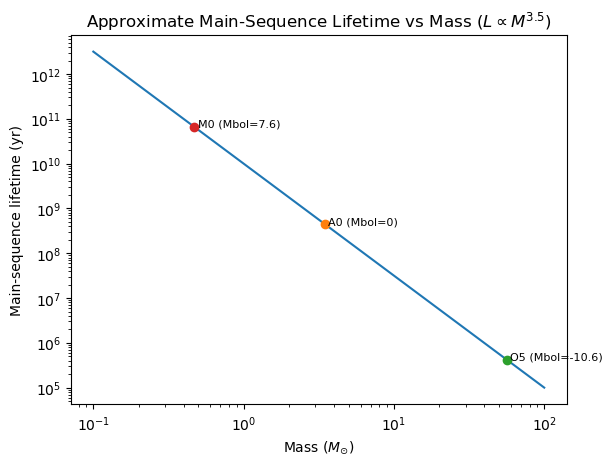

In [44]:
#Problem 10 - lifetime estimates and log-log plot

Mbol_sun = 4.74
alpha = 3.5

def L_from_Mbol(Mbol):
    return 10**(-0.4*(Mbol - Mbol_sun))

def mass_from_L(L, alpha=alpha):
    return L**(1.0/alpha)

def t_ms_from_M_L(M, L):
    return 1e10 * (M/L) # years

types = {
    'A0 (Mbol=0)': 0.0,
    'O5 (Mbol=-10.6)': -10.6,
    'M0 (Mbol=7.6)': 7.6,
}

for label, Mbol in types.items():
    L = L_from_Mbol(Mbol)
    M = mass_from_L(L, alpha)
    t = t_ms_from_M_L(M, L)
    print(label, {'L/Lsun': L, 'M/Msun (est)': M, 't_MS_yr (approx)': t})

#grid and curve
M_grid = np.logspace(-1, 2, 400)
L_grid = M_grid**alpha
t_grid = 1e10 * (M_grid / L_grid)

plt.figure()
plt.loglog(M_grid, t_grid)
plt.xlabel(r'Mass ($M_{\odot}$)')
plt.ylabel(r'Main-sequence lifetime (yr)')
plt.title(r'Approximate Main-Sequence Lifetime vs Mass ($L \propto M^{3.5}$)')

#annotate the three example points
for label, Mbol in types.items():
    L = L_from_Mbol(Mbol)
    M = mass_from_L(L, alpha)
    t = t_ms_from_M_L(M, L)
    plt.loglog(M, t, 'o')
    plt.text(M*1.05, t, label, fontsize=8)

plt.show()


### Discussion
These results show the dramatic dependence of stellar lifetime on mass:

| Spectral Type | $L/L_\odot$ | $M/M_\odot$ | $t_{\rm MS}$ (yr) |
|:--------------|-------------:|-------------:|------------------:|
| **O5** | $1.4\times10^6$ | $57$ | $4\times10^5$ |
| **A0** | $79$ | $3.5$ | $4\times10^8$ |
| **M0** | $0.072$ | $0.47$ | $6.5\times10^{10}$ |

The lifetimes span **five orders of magnitude**, from less than a million years for massive O-stars to tens of billions of years for cool M-dwarfs.  

The log–log plot of $t_{\rm MS}$ versus $M$ follows the expected $t_{\rm MS}\propto M^{-2.5}$ scaling: massive stars burn through fuel quickly, while low-mass stars live far beyond the current age of the Universe.
